In this project, I will try to analyse the suicidal death in year between 1985-2016.
Question:
1.Which data is necessary for analysis and get the data cleaned.
2.Whether we need to change the data type of any column for analysis.
3.Does poverty is the cause of suicidal death?
4.Distribution of suicidal death according to age, generation and gender.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./cleanData.csv')

In [3]:
df.head()

,Unnamed: 0,country,year,sex,age,suicides_no,population,suicide_per_hundred_k_pop,HDI for year,gdp_for_year,gdp_per_capita,generation
0,0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers


In [4]:
df.shape

(27820, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 27820 non-null  int64  
 1   country                    27820 non-null  object 
 2   year                       27820 non-null  int64  
 3   sex                        27820 non-null  object 
 4   age                        27820 non-null  object 
 5   suicides_no                27820 non-null  int64  
 6   population                 27820 non-null  int64  
 7   suicide_per_hundred_k_pop  27820 non-null  float64
 8   HDI for year               8364 non-null   float64
 9    gdp_for_year              27820 non-null  object 
 10  gdp_per_capita             27820 non-null  int64  
 11  generation                 27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


In [6]:
df.describe()

,Unnamed: 0,year,suicides_no,population,suicide_per_hundred_k_pop,HDI for year,gdp_per_capita
count,27820.000000,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,13909.500000,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8031.086581,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,0.000000,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,6954.750000,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,13909.500000,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,20864.250000,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,27819.000000,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [7]:
df.head()

,Unnamed: 0,country,year,sex,age,suicides_no,population,suicide_per_hundred_k_pop,HDI for year,gdp_for_year,gdp_per_capita,generation
0,0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers


In [26]:
# yws = df.pivot_table(index='year',values='suicides_no')
yws = df.pivot_table(index='year',values='suicide_per_hundred_k_pop')

In [27]:
print(yws)

      suicide_per_hundred_k_pop
year                           
1985                  11.826198
1986                  11.423333
1987                  11.644213
1988                  12.709405
1989                  12.879071
1990                  12.862956
1991                  13.438880
1992                  13.498564
1993                  13.833705
1994                  14.073272
1995                  15.662671
1996                  15.305422
1997                  14.954361
1998                  14.926920
1999                  14.532038
2000                  13.941328
2001                  13.519138
2002                  13.786550
2003                  13.205019
2004                  12.481944
2005                  12.068442
2006                  11.927461
2007                  12.025339
2008                  11.907686
2009                  11.400787
2010                  11.215900
2011                  11.015349
2012                  11.421718
2013                  11.107958
2014    

Text(0.5, 1.0, 'Suicide Per Year')

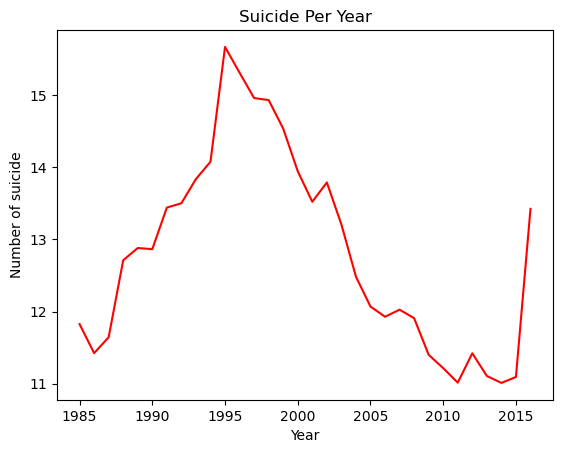

In [28]:
plt.plot(yws,'r')
plt.xlabel('Year')
plt.ylabel('Number of suicide')
plt.title('Suicide Per Year')

NOTE: The suicide counts dropped significantly in year 2016. But WHY?

What are the TOP 5 Countries with highest number of suicides?

In [11]:
cws = df.pivot_table(index='country',values='suicides_no',aggfunc='sum')
cwsDf = cws.reset_index()
cwsDf.sort_values(by=['suicides_no'],ascending=False).head()

,country,suicides_no
75,Russian Federation,1209742
98,United States,1034013
46,Japan,806902
33,France,329127
95,Ukraine,319950


In [12]:
#Multiple subplots
# fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(10,4))
# for axes in ax:
#     for x in axes:
#         x.plot(yws)
# fig.tight_layout()

SEABORN PRACTISE:

C:\Users\SAIFULLAH KHAN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


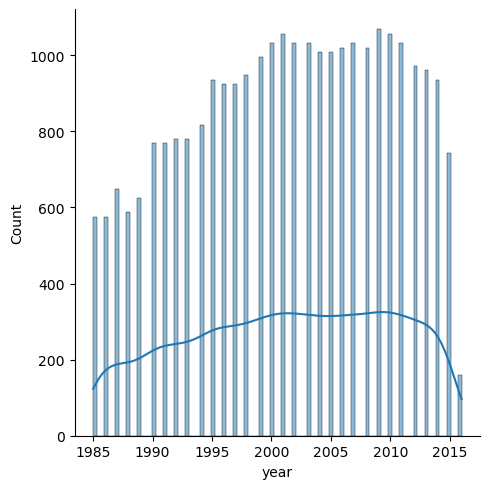

In [13]:
sns.displot(df['year'],bins=100,kde=True)

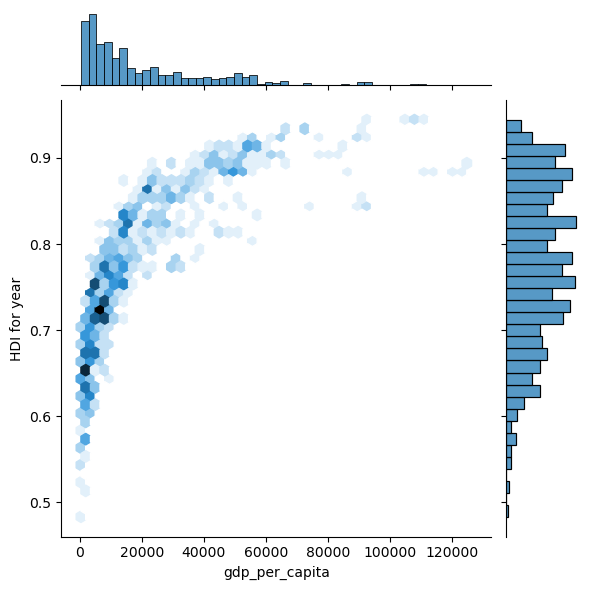

In [14]:
# sns.pairplot(data=df)
sns.jointplot(x='gdp_per_capita',y='HDI for year',data=df,kind='hex')

GROUP WISE ANALYSIS:
1. Which country has the highest suicide per lakh population.
2. Which country has the highest female suicide per lakh population respective the male of that country.

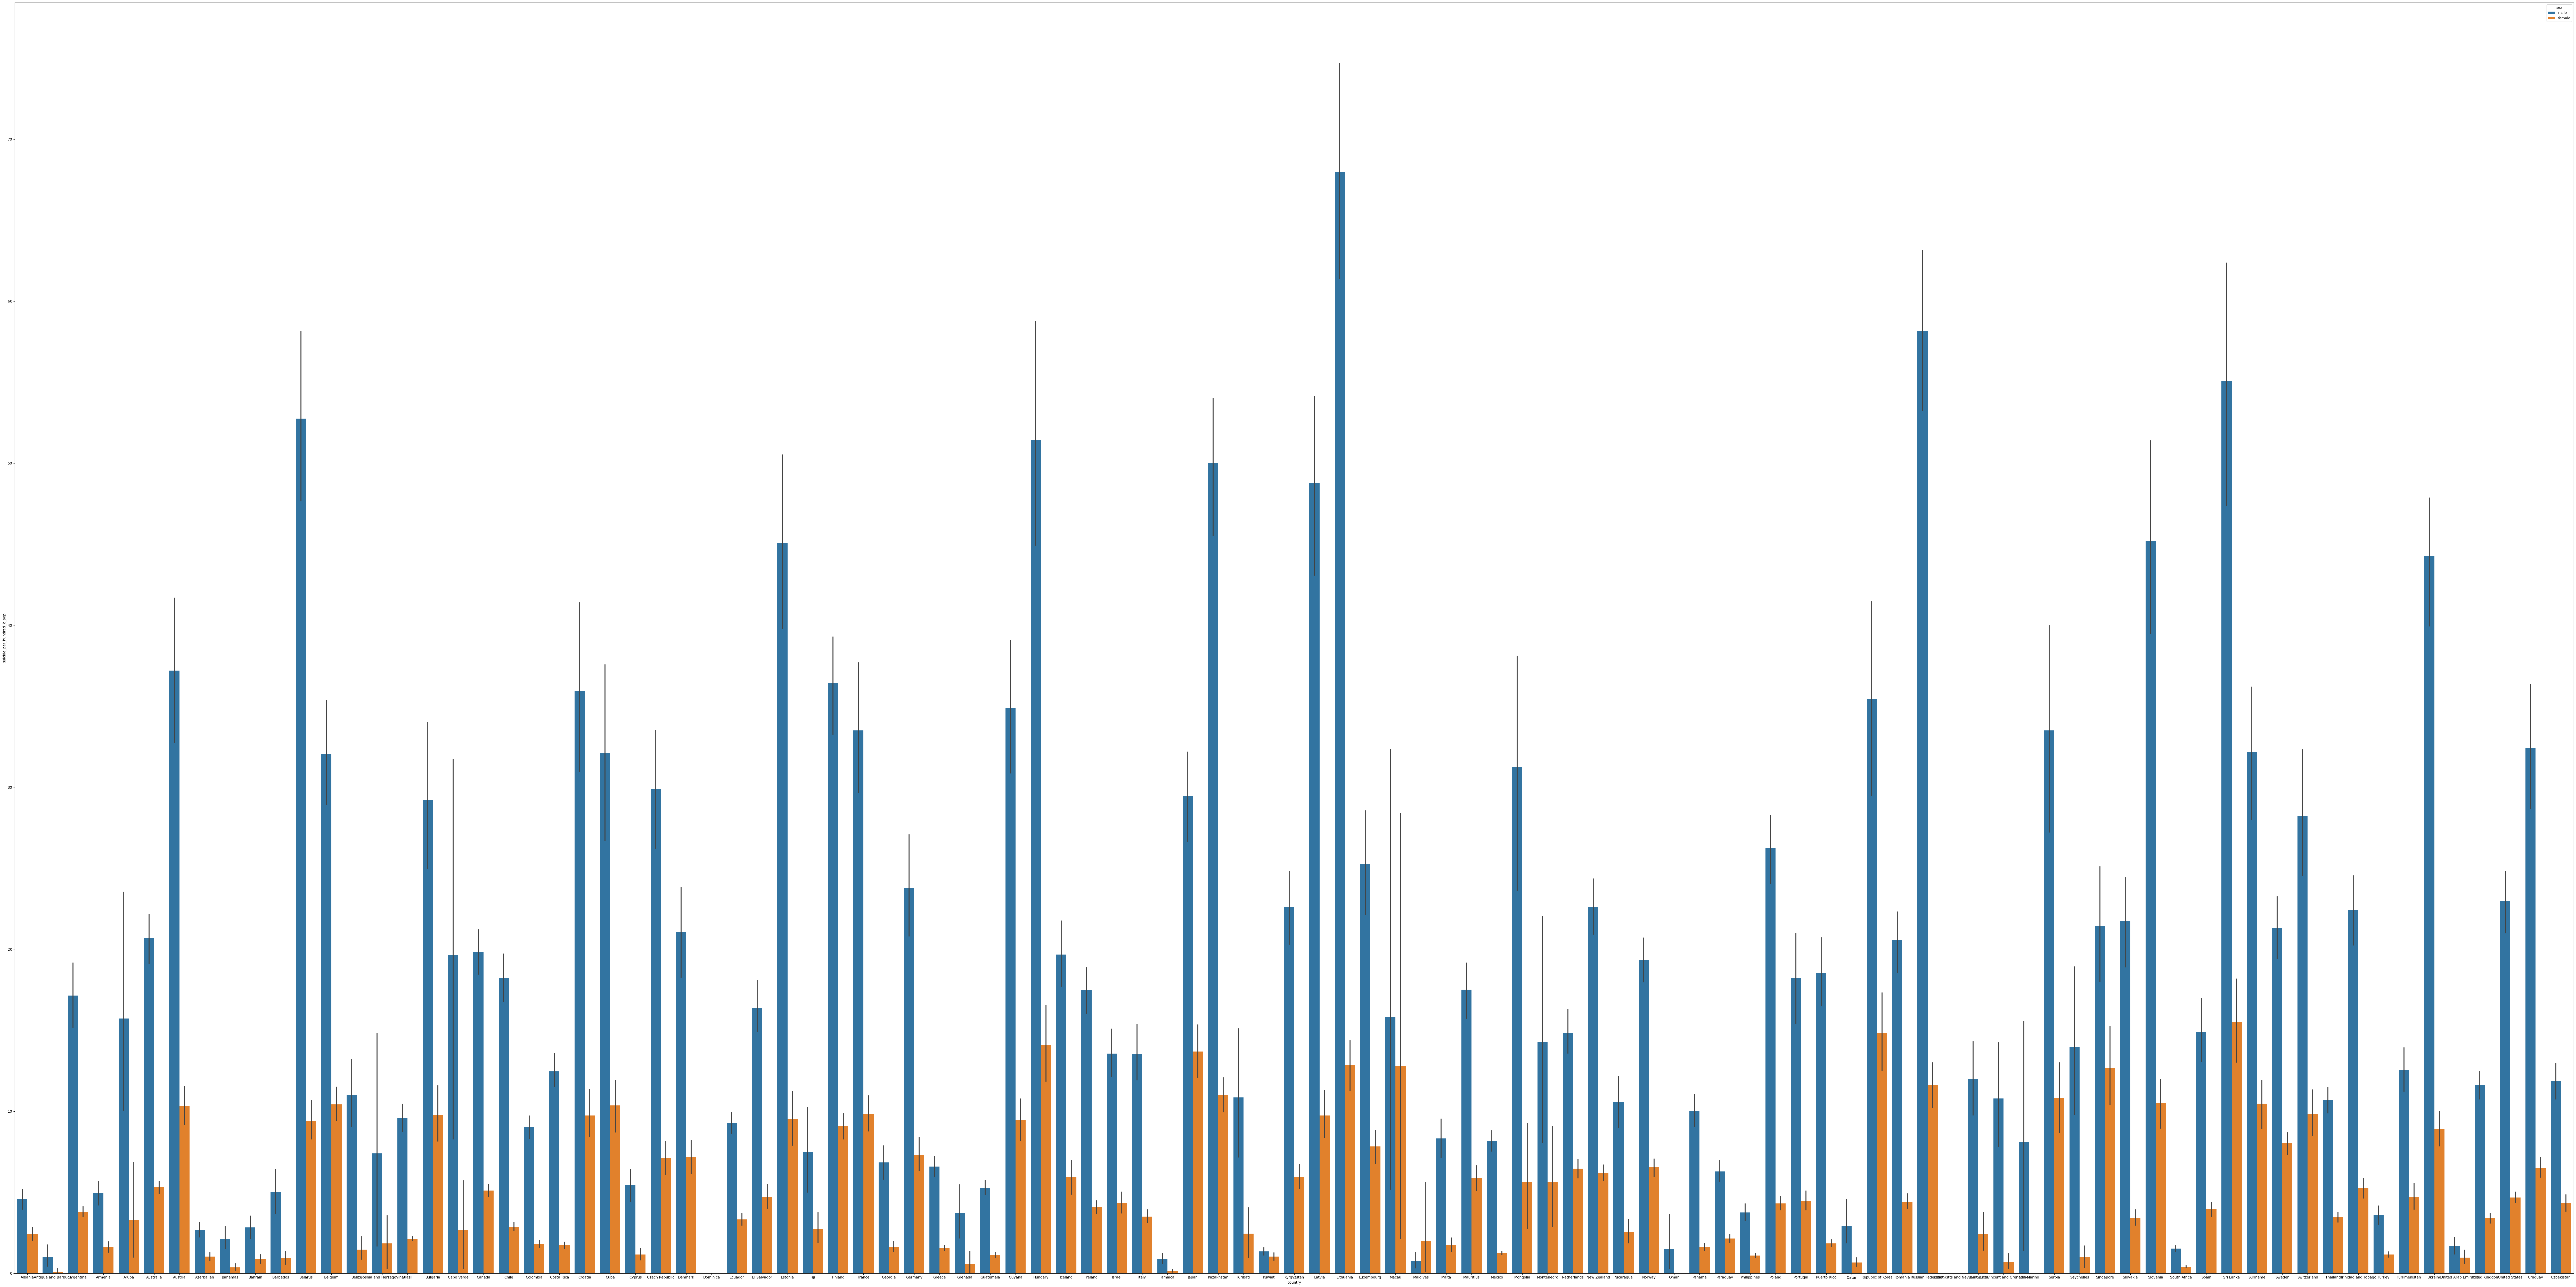

In [15]:
fig = plt.figure(figsize=(100,50))
sns.barplot(x='country',y='suicide_per_hundred_k_pop',data=df,hue='sex')
fig.tight_layout()
#Lithunia has the higest suicide per lakh population
#Maldives women have higest suicide per lakh poulation than men

<Axes: xlabel='country', ylabel='gdp_per_capita'>

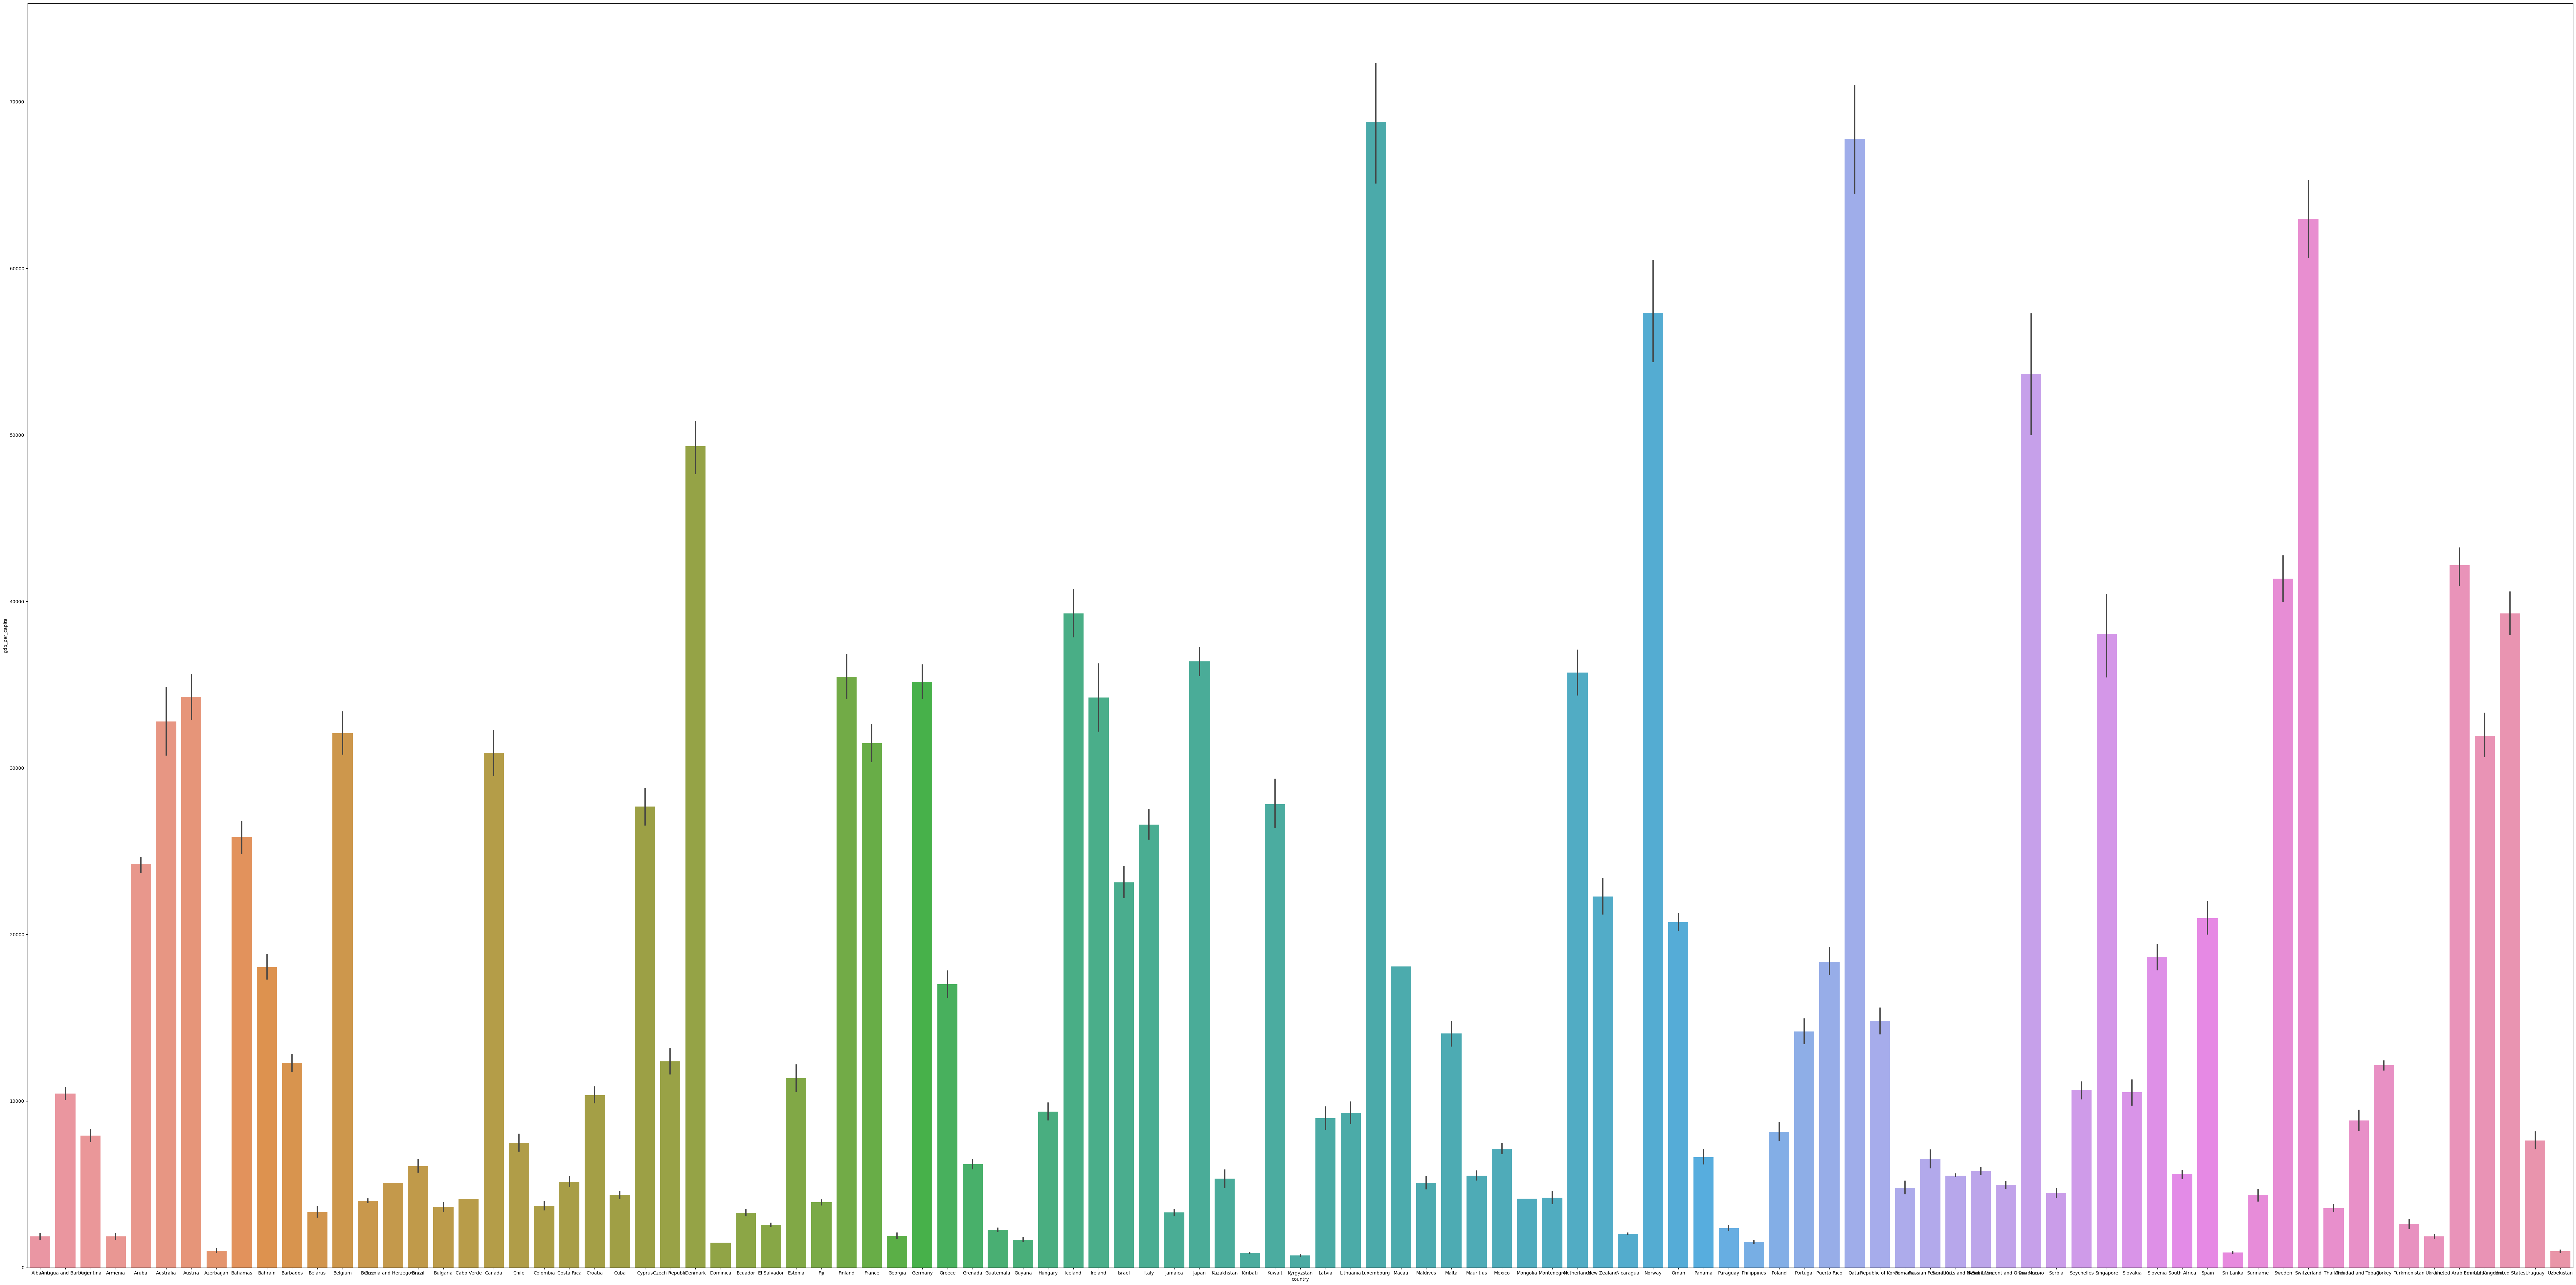

In [16]:
fig = plt.figure(figsize=(100,50))
sns.barplot(x='country',y='gdp_per_capita',data=df)

#Find the age and suicide destribution

<Axes: xlabel='age', ylabel='suicides_no'>

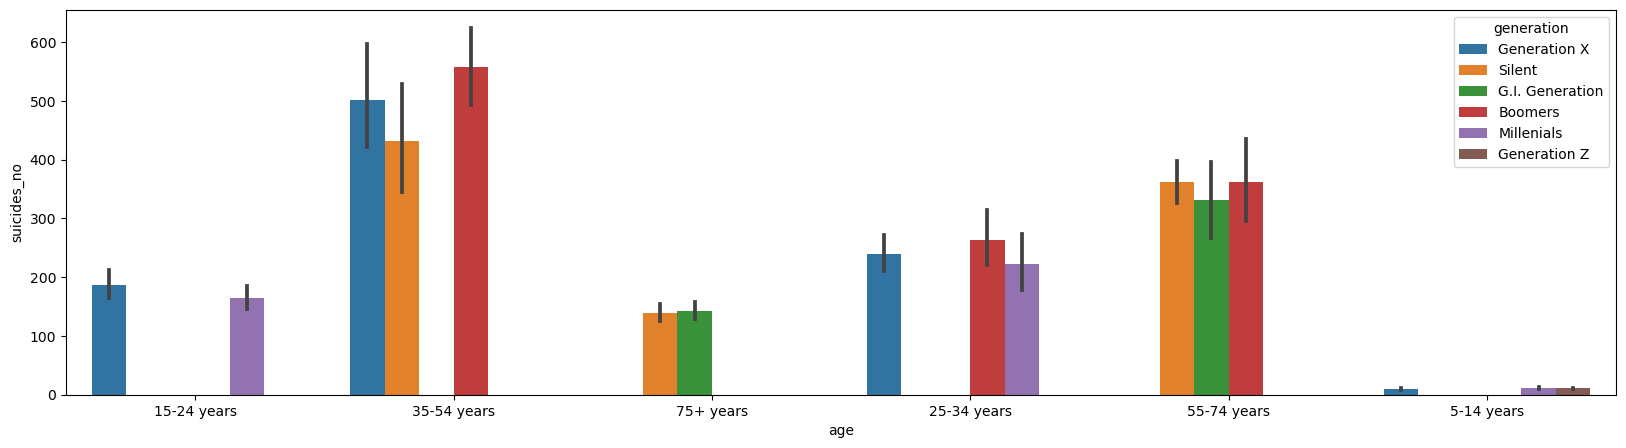

In [17]:
fig = plt.figure(figsize=(20,5))
sns.barplot(x='age',y='suicides_no',data=df,hue='generation')

WHICH Country in Which Year has the higest number of suicides per one lakh population

In [18]:
pMatrix = df.pivot_table(index='country',columns='year',values='suicide_per_hundred_k_pop',aggfunc='mean')

<Axes: xlabel='year', ylabel='country'>

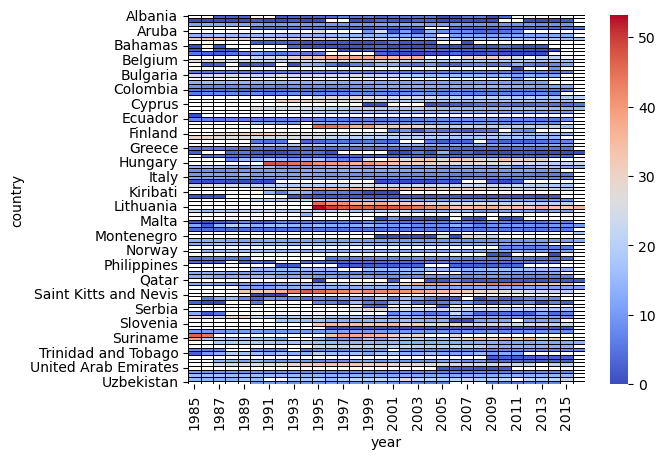

In [19]:
# fig = plt.figure(figsize=(100,100))
sns.heatmap(pMatrix,cmap='coolwarm',linecolor='black',linewidths=0.6)

NOTICE: Lithuania in Year 1995 has the higest rate of suicide per million

In [20]:
litDf = df[df['country'] == 'Lithuania']

<Axes: xlabel='generation', ylabel='suicide_per_hundred_k_pop'>

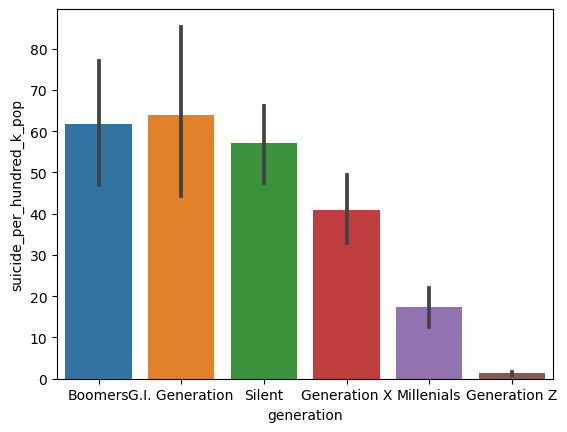

In [21]:
sns.barplot(x='generation',y='suicide_per_hundred_k_pop',data=litDf)

Find the destribution of suicides as per generation and Gender.

C:\Users\SAIFULLAH KHAN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


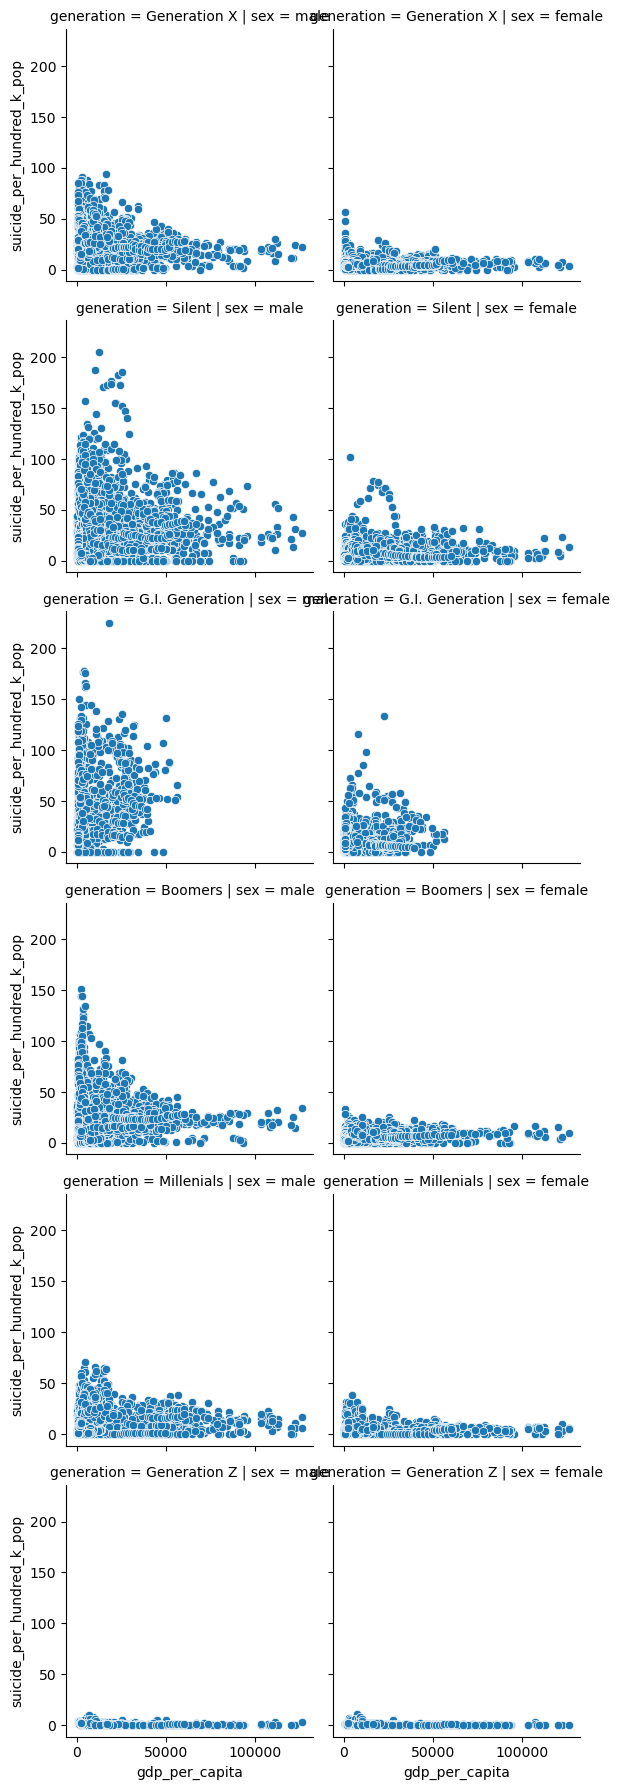

In [22]:
g = sns.FacetGrid(data=df,row='generation',col='sex')
g.map(sns.scatterplot,'gdp_per_capita','suicide_per_hundred_k_pop')

From the abover graph we can say that as gdp_per_capita increases the rate of suicide is either constant or decreases.

Now, Try to find the global gdp_per_capita trend across years.

In [33]:
res = df.groupby(by=['year','gdp_per_capita'])
# res.groups
# res.first()
# res.last()
# for gname, gcont in res:
#     print(gname)
#     print(gcont)
# res.get_group((1985, 431))

yDf = res.agg({'suicide_per_hundred_k_pop':'mean'}).reset_index()
result = yDf.groupby(by='year').agg({'gdp_per_capita':'mean','suicide_per_hundred_k_pop':'mean'})

In [34]:
result

,gdp_per_capita,suicide_per_hundred_k_pop
year,,
1985,6091.229167,11.826198
1986,7126.104167,11.423333
1987,8712.592593,11.644213
1988,9983.857143,12.709405
1989,9725.038462,12.879071
1990,9806.328125,12.862956
1991,10132.937500,13.438880
1992,10506.707692,13.498564
1993,10553.584615,13.833705


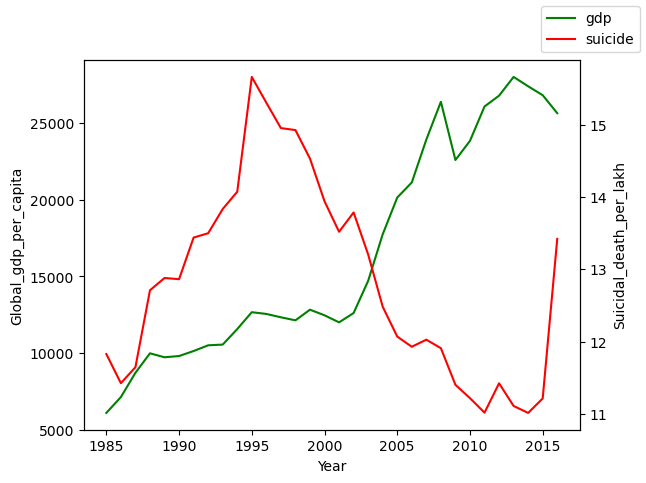

In [92]:
# fig = plt.figure(figsize=(20,20))
# axes1 = fig.add_axes([0.1,0.1,0.9,0.9])
# axes1.plot(result.reset_index()['year'],result.reset_index()['gdp_per_capita'])
# axes2 = fig.add_axes([0.1,0.1,0.9,0.9])
# axes2.plot(result.reset_index()['year'],result.reset_index()['suicide_per_hundred_k_pop'])
fig,ax1 = plt.subplots()
ax1.plot(result.reset_index()['year'],result.reset_index()['gdp_per_capita'],color='Green',label='gdp')
ax1.set_xlabel('Year')
ax1.set_ylabel('Global_gdp_per_capita')
ax2 = ax1.twinx()
ax2.plot(result.reset_index()['year'],result.reset_index()['suicide_per_hundred_k_pop'],color='red',label='suicide')
ax2.set_ylabel('Suicidal_death_per_lakh')
fig.legend(loc=1)

We can see the global gdp is increased with time so the HDI(Human Development Index) increases and relative decrease in suicidal death.